In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [101]:
dataset=pd.read_csv("mnist_784.csv")


In [102]:
dataset.head(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4


In [103]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Columns: 785 entries, pixel1 to class
dtypes: int64(785)
memory usage: 419.2 MB


In [104]:
x=dataset.iloc[:,0:784].values
y=dataset['class'].values


In [105]:
y

array([5, 0, 4, ..., 4, 5, 6], dtype=int64)

# splitting the data into 30-70

In [106]:
splitter=int((y.shape[0])*0.8)
x_train=x[:splitter,:]
y_train=y[:splitter]
x_test=x[splitter:,:]
y_test=y[splitter:]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(56000, 784)
(56000,)
(14000, 784)
(14000,)


# defining a function that will calculate distance between two points

In [107]:
def dist(a1,a2):
      return np.sqrt(sum((a1-a2)**2))

# lets visualise the image

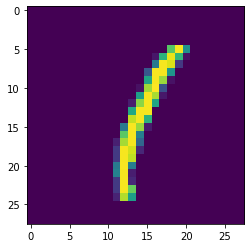

In [108]:
def drawimg(img):
    img=np.reshape(img,(28,28))
    plt.imshow(img)
    plt.show()
drawimg(x_test[0])

# defining the main knn function


In [111]:
def knn_algorithm(x_train,y_train,query_point,k):
    # distances will store the distances between the two points
    distances=[]
    for i in range(x_train.shape[0]):
        t=dist(query_point,x_train[i])
        # we are storing the distance and particular class the distance is measured from.
        distances.append((t,y_train[i]))
    # now sorting the distances list  to get the least 5 distances
    distances=sorted(distances)
    # taking out least k points 
    k_nearest_neighbours=distances[:k]
    # converting k_nearest_neighbour to array
    k_nearest_neighbours=np.array(k_nearest_neighbours)
    print(k_nearest_neighbours)
    # now  getting the frequency of  all classes
    frequency_neighbour=np.unique(k_nearest_neighbours[:,1],return_counts=True)
    # print(frequency_neighbour)
    max_frequency_index=frequency_neighbour[1].argmax()
    # print(max_frequency_index)
    pred=frequency_neighbour[0][max_frequency_index]
    return pred



[[472.82026183   1.        ]
 [627.36990683   1.        ]
 [634.78657831   1.        ]
 [668.36068107   1.        ]
 [679.88307818   1.        ]]


1.0

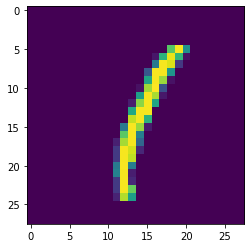

In [114]:
drawimg(x_test[0])

In [115]:
knn_algorithm(x_train=x_train,y_train=y_train,query_point=x_test[0],k=5)


[[472.82026183   1.        ]
 [627.36990683   1.        ]
 [634.78657831   1.        ]
 [668.36068107   1.        ]
 [679.88307818   1.        ]]


1.0

In [116]:
y_test[0]

1

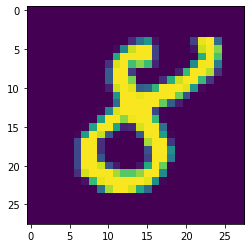

In [117]:
drawimg(x_test[1])

In [118]:
knn_algorithm(x_train=x_train,y_train=y_train,query_point=x_test[1],k=5)

[[1505.74300596    8.        ]
 [1507.25445761    8.        ]
 [1536.08723711    8.        ]
 [1606.10211381    8.        ]
 [1654.53951298    8.        ]]


8.0

In [120]:
y_test[1]

8